the package swmmio and pyswmm can work together. 

In [2]:
import swmmio
import pandas as pd
pd.set_option('display.max_columns', None)


In [3]:
model = swmmio.Model("Example1_drainage.inp")

In [4]:
model.summary

{'num_subcatchments': 8,
 'num_conduits': 13,
 'num_junctions': 13,
 'num_outfalls': 1,
 'num_raingages': 1,
 'catchment_area': 71,
 'mean_subcatchment_slope': 0.010000000000000002,
 'total_conduit_length': 4300,
 'invert_range': 35}

the 'swmmio' is often used to visualize the model parameters.

In [17]:
# get the data related to links
model.links.dataframe.head()

,InletNode,OutletNode,Length,Roughness,InOffset,OutOffset,InitFlow,MaxFlow,Shape,Geom1,Geom2,Geom3,Geom4,Barrels,Type,MaxQ,MaxDay,MaxHr,MaxV,MaxQPerc,MaxDPerc,coords
Name,,,,,,,,,,,,,,,,,,,,,,
1,9,10,400,0.01,0,0,0,0,CIRCULAR,1.5,0,0,0,1,CONDUIT,4.65,0,04:01,7.60,0.30,0.38,"[(4042.11, 9600.0), (4105.26, 6947.37)]"
4,19,20,200,0.01,0,0,0,0,CIRCULAR,1.0,0,0,0,1,CONDUIT,0.78,0,04:02,6.11,0.11,0.22,"[(7768.42, 6736.84), (5957.89, 6589.47)]"
5,20,21,200,0.01,0,0,0,0,CIRCULAR,1.0,0,0,0,1,CONDUIT,0.78,0,04:02,9.00,0.06,0.17,"[(5957.89, 6589.47), (4926.32, 6105.26)]"
6,10,21,400,0.01,0,1,0,0,CIRCULAR,1.0,0,0,0,1,CONDUIT,4.93,0,02:53,7.01,1.06,1.00,"[(4105.26, 6947.37), (4926.32, 6105.26)]"
7,21,22,300,0.01,1,1,0,0,CIRCULAR,2.0,0,0,0,1,CONDUIT,5.41,0,04:02,7.18,0.18,0.29,"[(4926.32, 6105.26), (4421.05, 4715.79)]"


In [16]:
model.subcatchments.dataframe.head()

,Raingage,Outlet,Area,PercImperv,Width,PercSlope,CurbLength,N-Imperv,N-Perv,S-Imperv,S-Perv,PctZero,RouteTo,TotalPrecip,TotalRunon,TotalEvap,TotalInfil,ImpervRunoff,PervRunoff,TotalRunoffIn,TotalRunoffMG,PeakRunoff,RunoffCoeff,coords
Name,,,,,,,,,,,,,,,,,,,,,,,,
1,RG1,9,10,50,500,0.01,0,0.001,0.1,0.05,0.05,25,OUTLET,2.65,0.0,0.0,1.16,1.32,0.17,1.48,0.40,4.66,0.559,"[(3936.84, 6905.26), (3494.74, 6252.63), (273.68, 6336.84), (252.63, 8526.32), (463.16, 9200.0), (1157.89, 9726.32), (4000.0, 9705.26), (3936.84, 6905.26)]"
2,RG1,10,10,50,500,0.01,0,0.001,0.1,0.05,0.05,25,OUTLET,2.65,0.0,0.0,1.21,1.32,0.11,1.43,0.39,4.52,0.539,"[(7600.0, 9663.16), (7705.26, 6736.84), (5915.79, 6694.74), (4926.32, 6294.74), (4189.47, 7200.0), (4126.32, 9621.05), (7600.0, 9663.16)]"
3,RG1,13,5,50,500,0.01,0,0.001,0.1,0.05,0.05,25,OUTLET,2.65,0.0,0.0,1.16,1.32,0.17,1.49,0.20,2.45,0.561,"[(2357.89, 6021.05), (2400.0, 4336.84), (3031.58, 4252.63), (2989.47, 3389.47), (315.79, 3410.53), (294.74, 6000.0), (2357.89, 6021.05)]"
4,RG1,22,5,50,500,0.01,0,0.001,0.1,0.05,0.05,25,OUTLET,2.65,0.0,0.0,1.16,1.32,0.17,1.49,0.20,2.45,0.561,"[(3473.68, 6105.26), (3915.79, 6421.05), (4168.42, 6694.74), (4463.16, 6463.16), (4821.05, 6063.16), (4400.0, 5263.16), (4357.89, 4442.11), (4547.37, 3705.26), (4000.0, 3431.58), (3326.32, 3368.42..."
5,RG1,15,15,50,500,0.01,0,0.001,0.1,0.05,0.05,25,OUTLET,2.65,0.0,0.0,1.24,1.31,0.09,1.40,0.57,6.56,0.528,"[(2568.42, 3200.0), (4905.26, 3136.84), (5221.05, 2842.11), (5747.37, 2421.05), (6463.16, 1578.95), (6610.53, 968.42), (6589.47, 505.26), (1305.26, 484.21), (968.42, 336.84), (315.79, 778.95), (31..."


In [7]:
model.inp.raingages

,RainType,TimeIntrvl,SnowCatch,DataSource,DataSourceName
Name,,,,,
RG1,INTENSITY,1:00,1.0,TIMESERIES,TS1


In [8]:
# here is the exsiting outfalls DataFrame
model.inp.outfalls

,InvertElev,OutfallType,StageOrTimeseries
Name,,,
18,975,FREE,NO


In [9]:
model.nodes.dataframe


,InvertElev,MaxDepth,InitDepth,SurchargeDepth,PondedArea,OutfallType,StageOrTimeseries,coords
Name,,,,,,,,
9,1000,3.0,0.0,0.0,0.0,NaN,NaN,"[(4042.11, 9600.0)]"
10,995,3.0,0.0,0.0,0.0,NaN,NaN,"[(4105.26, 6947.37)]"
13,995,3.0,0.0,0.0,0.0,NaN,NaN,"[(2336.84, 4357.89)]"
14,990,3.0,0.0,0.0,0.0,NaN,NaN,"[(3157.89, 4294.74)]"
15,987,3.0,0.0,0.0,0.0,NaN,NaN,"[(3221.05, 3242.11)]"
16,985,3.0,0.0,0.0,0.0,NaN,NaN,"[(4821.05, 3326.32)]"
17,980,3.0,0.0,0.0,0.0,NaN,NaN,"[(6252.63, 2147.37)]"
19,1010,3.0,0.0,0.0,0.0,NaN,NaN,"[(7768.42, 6736.84)]"
20,1005,3.0,0.0,0.0,0.0,NaN,NaN,"[(5957.89, 6589.47)]"


In [10]:
model.inp.subcatchments

,Raingage,Outlet,Area,PercImperv,Width,PercSlope,CurbLength
Name,,,,,,,
1,RG1,9,10,50,500,0.01,0
2,RG1,10,10,50,500,0.01,0
3,RG1,13,5,50,500,0.01,0
4,RG1,22,5,50,500,0.01,0
5,RG1,15,15,50,500,0.01,0
6,RG1,23,12,10,500,0.01,0
7,RG1,19,4,10,500,0.01,0
8,RG1,18,10,10,500,0.01,0


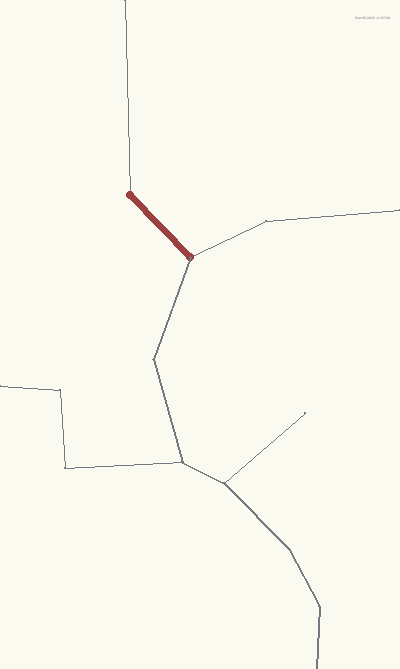

In [11]:
swmmio.draw_model(model, px_width=200)

The following codes show how the swmmio can be used to interact with the pyswmm, for conducting the hydraulic simulation

In [12]:
import pyswmm 


<Axes: title={'center': 'Link Flows'}>

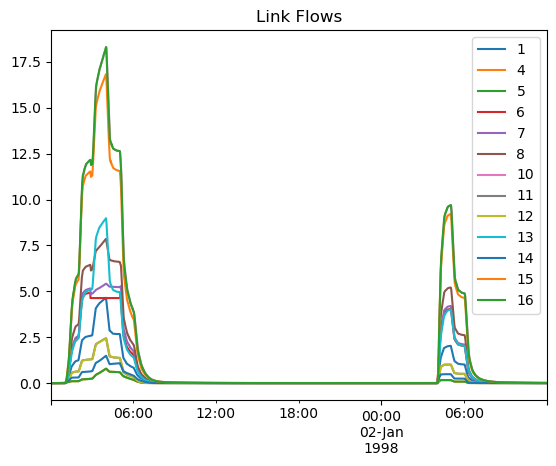

In [13]:

link_flows = dict()

# Run simulation PySWMM  
with pyswmm.Simulation(model.inp.path) as sim:

  # get link ids  
  link_ids = model.inp.conduits.index
  
  for step in sim:
    # store each link's flow in a dictionary 
    link_flows[sim.current_time] = {
      link_id: pyswmm.Links(sim)[link_id].flow 
      for link_id in link_ids
  }

pd.DataFrame(link_flows).T.plot(title='Link Flows')

In [14]:
flow_results = pd.DataFrame(link_flows)

In [15]:
flow_results.T

,1,4,5,6,7,8,10,11,12,13,14,15,16
1998-01-01 00:01:00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998-01-01 00:02:00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998-01-01 00:03:00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998-01-01 00:04:00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998-01-01 00:05:00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-01-02 11:55:00,0.001272,0.0,0.0,0.002584,0.002669,0.003004,0.007159,0.000247,0.000272,0.003630,0.000043,0.006687,0.006949
1998-01-02 11:56:00,0.001264,0.0,0.0,0.002567,0.002651,0.002983,0.007111,0.000245,0.000270,0.003607,0.000043,0.006644,0.006904
1998-01-02 11:57:00,0.001256,0.0,0.0,0.002550,0.002634,0.002964,0.007064,0.000243,0.000268,0.003584,0.000042,0.006600,0.006858
1998-01-02 11:58:00,0.001247,0.0,0.0,0.002533,0.002616,0.002944,0.007018,0.000242,0.000266,0.003561,0.000042,0.006557,0.006814
